# Binding Energy
12/08/2019
Here are the equation and other necessary information to impliment. 
<img src="figs/equations.png" width="800">

In [109]:
import numpy as np
import pylab as plt


"""
some pre calculations
(2*a+1)%2 = 1  if a even
(2*a+1)%2 = 0  if a odd

(2*z+1)%2 = 1  if z even
(2*z+1)%2 = 0  if z odd
"""


def get_a5(A,Z):
    
    if type(A)==int and type(Z)==int:
        A=np.array([A]); Z= np.array([Z])
    
    a5=np.zeros(len(A))
    for i in range(len(A)):
        if (A[i] %2) ==0:
            #print ("A is even")
            a5[i]=12.0
            if (Z[i] %2) != 0:
                #print ("Z is odd")
                a5[i] *=(-1)
    return a5
    

def Binding_ene(A, Z, BE_per_A=False):
    a1=15.67; a2= 17.23; a3=0.75; a4=93.2;
    
    a5=get_a5(A,Z);
    B= a1*A - a2*np.power(A, 2./3.) -a3 * Z**2 * np.power(A, -1./3.) \
            -a4 * (A-2*Z)**2/A  + a5 * np.power(A, -1/2)
    
    if BE_per_A :
        res= B/A
    else:
        res=B

    if len(res)==1:
        return res[0]
    return res



## Question (a) and (b)

In [110]:
A=58; Z=28
B = Binding_ene(A,Z)
print ("Binding Ene for A= %i and Z=%i: %f" %(A, Z, B))

BperA=Binding_ene(A, Z, BE_per_A=True)
print ("Binding Ene per Nucleon, for A= %i and Z=%i: %f" %(A, Z, BperA))


Binding Ene for A= 58 and Z=28: 493.935607
Binding Ene per Nucleon, for A= 58 and Z=28: 8.516131


## Question c

In [135]:

BE=0.
As=0
Zs=0
for Z in range(10,50):
    for A in range(Z, 3*Z+1):
        #print (A, Z)
        B= Binding_ene(A, Z, BE_per_A=True )
        #print (A, Z, B)
        if B > BE :
            BE=B; As=A;Zs=Z
print ("Most stable atoms with A= %i, Z=%i and BE_per_A = %f" %(As,Zs, BE) )
    

Most stable atoms with A= 50, Z=24 and BE_per_A = 8.532623


## Question D

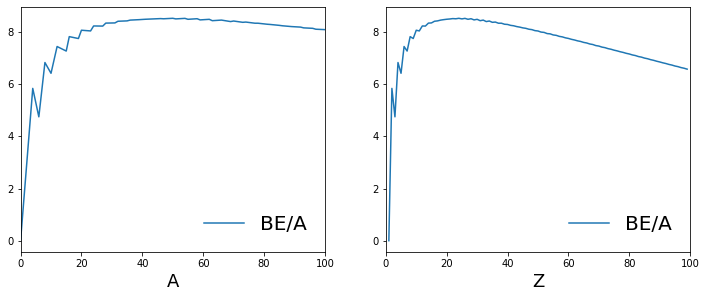

In [173]:
BE_L=[]; 
A_L=[]
Z_L=range(1,100);
for Z in Z_L:
    BE_Z=0; A_Z=0
    for A in range(Z, 3*Z+1):
        be=Binding_ene(A, Z, BE_per_A=True)
        if be>BE_Z:
            BE_Z = be; A_Z=A
    BE_L.append(BE_Z)
    A_L.append(A_Z)

#print (len(A_L), len(BE_L))
#print (BE_L, A_L)

plt.figure(figsize=(12,4.5))
plt.subplot(121)
plt.plot(A_L, BE_L, label='BE/A')
plt.xlabel('A', fontsize=18)
plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.xlim([0,100]);

plt.subplot(122)
plt.plot(range(1,100), BE_L, label='BE/A')
plt.xlabel('Z', fontsize=18)
plt.legend(loc='lower right', fontsize=20, frameon=False)
plt.xlim([0,100]);

plt.savefig('figs/BE_A.pdf')


In [175]:
indx=np.argmax(BE_L)

print (BE_L[indx], BE_L[indx-1], BE_L[indx+1])
print (A_L[indx])
print (Z_L[indx])


8.532622751365931 8.51427985673783 8.509541272617627
50
24
